# Describe the elevation of the star during the night

https://github.com/sylvielsstfr/MonoCamMay2016/blob/master/MyReduction_2016_05_09/StarSkyElevation_HD163466_y4_2016-05-09.ipynb

In [1]:
import urllib
import IPython.display
import numpy as np
import astropy

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

In [4]:
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

In [5]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [6]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

# Defines coordinate system

In [7]:
hd_116405_starloc=astropy.coordinates.SkyCoord.from_name('HD116405')

In [8]:
from astropy.coordinates import Longitude, Latitude
PDM_Longitude=Longitude(u'0°08′34″') 
PDM_Latitude=Latitude(u'42°56′11″')
PDM_Height=2.877*u.m

In [9]:
#definition of the location to astropy
PDM_location = astropy.coordinates.EarthLocation(lat=PDM_Latitude, lon=PDM_Longitude, height=PDM_Height)

In [10]:
from astropy.coordinates import get_sun,get_moon
utcoffset = 1*u.hour  # France
midnight = Time('2019-2-16 00:00:00') - utcoffset
delta_midnight = np.linspace(-12, 12, 1000)*u.hour

times_feb15_to_16 = midnight + delta_midnight
frame_feb15_to_16 = AltAz(obstime=times_feb15_to_16, location=PDM_location)
sunaltazs_feb15_to_16 = get_sun(times_feb15_to_16).transform_to(frame_feb15_to_16)
moonaltazs_feb15_to_16 = get_moon(times_feb15_to_16).transform_to(frame_feb15_to_16)

In [11]:
hd_116405_altazs_feb15_to_16 = hd_116405_starloc.transform_to(frame_feb15_to_16)

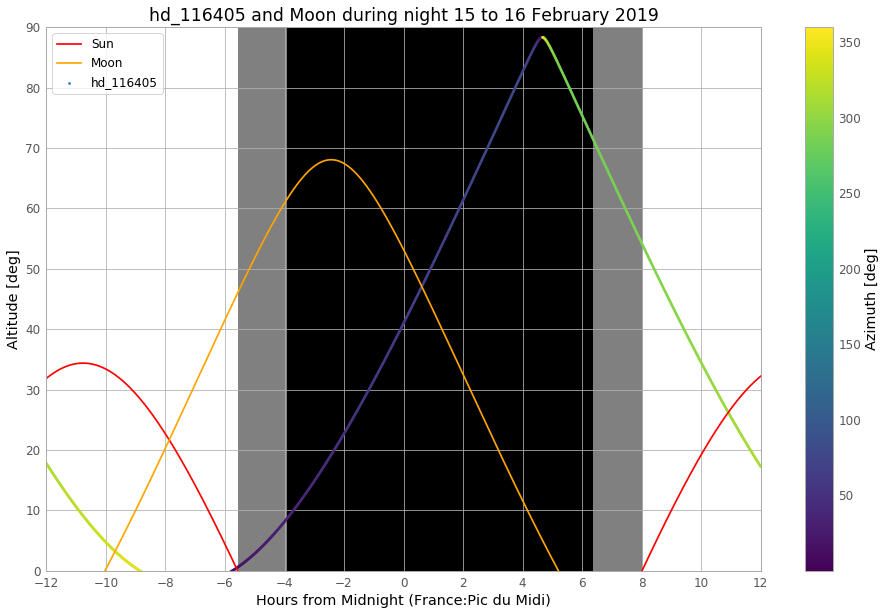

In [12]:
plt.figure(figsize=(16.,10.))
plt.plot(delta_midnight, sunaltazs_feb15_to_16.alt, color='r', label='Sun')
plt.plot(delta_midnight, moonaltazs_feb15_to_16.alt, color='orange', label='Moon')
plt.scatter(delta_midnight, hd_116405_altazs_feb15_to_16.alt,
            c=hd_116405_altazs_feb15_to_16.az, label='hd_116405', lw=0, s=8,
            cmap='viridis')

# plot astronomical crepuscule
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_feb15_to_16.alt < -0*u.deg, color='0.5', zorder=0)
#plot astronomical night
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_feb15_to_16.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.title('hd_116405 and Moon during night 15 to 16 February 2019')
plt.xlabel('Hours from Midnight (France:Pic du Midi)')
plt.ylabel('Altitude [deg]')
plt.show()

In [13]:
midnight = Time('2019-2-16 00:00:00') - utcoffset

In [14]:
midnight

<Time object: scale='utc' format='iso' value=2019-02-15 23:00:00.000>

In [15]:
onehour=Time('2019-2-15 2:00:00') - utcoffset

In [16]:
onehour

<Time object: scale='utc' format='iso' value=2019-02-15 01:00:00.000>

In [17]:
(onehour-midnight).sec

-79200.0

In [18]:
datetime?